# In depth Analysis
The data set containing the temperatures of 30 cities is being modeled to predicted the weather of Vancouver which is part of the given data set.

The data is wrangled and ready to be used for modeling.
We will split the data into training set and train different models on it and test the model on the testing test. We will split the data set into 80% training and 20% testing data set.

For the times series data, appropriate models to choose would be time series models like ARIMA. But I want explore and learn about Linear Regression and so am trying out Linear Regression.

## Linear Regression Model

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
#from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Dataset being loaded as dataframe
file = 'temperature_cleaned.csv'

# datetime column parsed as Datetime type, datetime column as index
df = pd.read_csv(file, parse_dates=['datetime'], index_col='datetime')

# Deleting unnamed column which is introduced from csv file
df = df.drop(df.columns[[0]], axis=1)

# Convert Kelvin to Fahrenheit
df = df.applymap(lambda x: int(9/5 * (x-273) + 32))

# Filtering the data to contain temperatures at 12 noon each day
df1 = df[df.index.hour == 12]
#df1['Date'] = df1.index.map(dt.datetime.toordinal)
df1['Date'] = (df1.index+timedelta(days=1)).map(dt.datetime.toordinal)


C:\SAnaconda\NewfolderForAnaconda\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [49]:
# Build the feature vector and target matrix
X = df1.iloc[:, 1:31].values #Other cities and date
y = df1.iloc[:, 0].values #Vancouver temperature

#splitting dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=False)
#true_data = X_train[:,29] #date
true_data = X_test[:,29] #date
#true_data = X_test[:,2] #date #for 3 feature
true_date = np.zeros(0) 
for i in true_data:
    true_date = np.append(true_date, dt.datetime.fromordinal(i))
#print(true_date)


In [57]:
# Function to fit the data to the model passed in the function and plot the data
def model_and_plot(reg, display_title):
    #reg = LinearRegression()
    #Fit the model with training data
    reg.fit(X_train, y_train)
    print('\n')
    print('\n')
    print(display_title[1] + ' {}'.format(round(reg.score(X_train, y_train), 4)))
    #print(reg.score(X_train, y_train))
    print(display_title[2] + ' {}'.format(round(reg.score(X_test, y_test), 4)))
    #plt.scatter(X_train, y_train, color = 'red')
    plt.scatter(true_date, y_test, color = 'red', label='Actual')
    plt.plot(true_date, reg.predict(X_test), color = 'blue', label='Predicted')
    plt.xticks(rotation='60')
    plt.xlabel('Date')
    plt.ylabel('Temperature F')
    plt.legend()
    plt.title(display_title[0])
    plt.show()
    return reg
    





Linear Regression training set R2 score is 0.8899
Linear Regression testing set R2 score is 0.8632


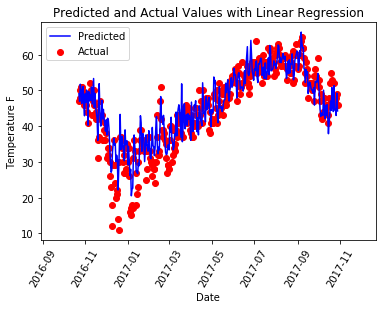

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
# Create an instance of LinearRegression
lr = LinearRegression()    
msgs = ['Predicted and Actual Values with Linear Regression','Linear Regression training set R2 score is','Linear Regression testing set R2 score is']
model_and_plot(lr, msgs)

With Linear Regression model, R2 score on training set is 0.88 and 0.86. 
R2 score for better model will be close to 1. A model with R2 score further away from 1 is considered bad model

## Random Forest Regression





Random Forest Regressor score on training set is  0.9785
Random Forest Regressor score on testing set is 0.8338


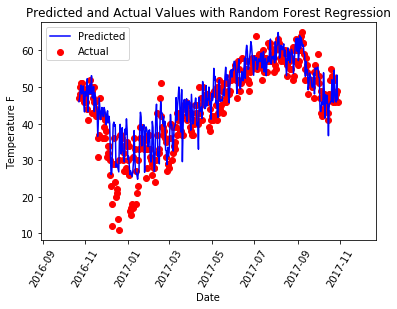

Mean Absolute Error: 3.27 degrees.
Accuracy: 90.16 %.


In [59]:
# Create an instance of RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
titles = ['Predicted and Actual Values with Random Forest Regression','Random Forest Regressor score on training set is ','Random Forest Regressor score on testing set is']
model_and_plot(rf, titles)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
errors = abs(y_pred - y_test) ## Calculate the absolute errors
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y_test) ##Calculate mean absolute percentage error (MAPE)
accuracy = 100 - np.mean(mape) # Calculate accuracy
print('Accuracy:', round(accuracy, 2), '%.')



There is big difference in R2 scores for training and testing data. This means that training data is being overfitted, the model is being trained very well by the training data but when the model is tried on new set of data, which can be testing data, it is not performing as good as on training set.  
We have to improve the model so that overfitting does not occur.

We can consider this as basemodel and it's performance metrics are measured by Mean absolute Error and Accuracy.

We will try to improve the performance by tuning the hyperparameters. This can be achieved through GridSearchCV where in a search will be performed for different set of parameters and returns the best set. 


## Tuning the hyperparameters by GridSearchCV





The best parmas are 

{'bootstrap': True, 'max_depth': 3, 'max_features': 30, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 50}




Random Forest Regressor score with best params by GridSearchCV on training set is  0.8676
Random Forest Regressor score with best params by GridSearchCV on testing set is  0.8212


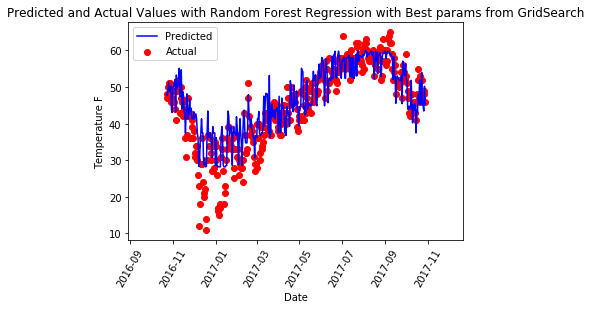

Mean Absolute Error: 3.37 degrees.
Accuracy: 89.59 %.


In [68]:
# GridSearchCV

# Create the parameter grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 4, 5, None],
    'max_features': [2, 3, 30],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [40, 50, 60]
}

# Create an instantance of the grid search model
#rf_default = RandomForestRegressor()
grid_search_model = GridSearchCV(estimator = rf, param_grid = param_grid, verbose = 0)
grid_search_model.fit(X_train, y_train)
print('\n')
print('\n')
print('The best parmas are \n')
print(grid_search_model.best_params_)
best_grid = grid_search_model.best_estimator_
titles = ['Predicted and Actual Values with Random Forest Regression with Best params from GridSearch', 'Random Forest Regressor score with best params by GridSearchCV on training set is ', 'Random Forest Regressor score with best params by GridSearchCV on testing set is ']
best_grid = model_and_plot(best_grid, titles)
y_pred = best_grid.predict(X_test)
errors = abs(y_pred - y_test) ## Calculate the absolute errors
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y_test) ##Calculate mean absolute percentage error (MAPE)
accuracy = 100 - np.mean(mape) # Calculate accuracy
print('Accuracy:', round(accuracy, 2), '%.')



Difference in R2 scores of traing data and test data has reduced which means training data is not overfitted, but the accuracy has decreased by little less than 0.5% which we can live with as it is performing better on test data. 

## Gradient Boosting Regressor

Now let's try the same data on Gradient Boosting Regressor Model and check how it performs, whether it performs better or worse than Random Forest Regressor Model. 





Gradient boosting Regressor score on training set is  0.9421
Gradient boosting Regressor score on testing set is  0.8624


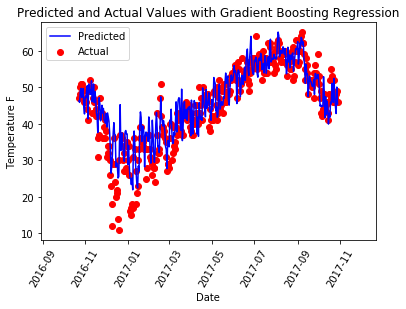

Mean Absolute Error: 2.94 degrees.
Accuracy: 91.15 %.


In [74]:
# Create an instance of GradientBoostingRegressor
gbr = ensemble.GradientBoostingRegressor()
titles = ['Predicted and Actual Values with Gradient Boosting Regression', 'Gradient boosting Regressor score on training set is ', 'Gradient boosting Regressor score on testing set is ']
gbr_model = model_and_plot(gbr, titles)
y_pred = gbr_model.predict(X_test)
errors = abs(y_pred - y_test) ## Calculate the absolute errors
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y_test) ##Calculate mean absolute percentage error (MAPE)
accuracy = 100 - np.mean(mape) # Calculate accuracy
print('Accuracy:', round(accuracy, 2), '%.')



Gradient Boosting Regressor is performing better than Random Forest Regressor by having an increase in accuracy by 1% but there is overfitting of data.
We will check if it can be improved by considering only the important features in the feature vector. We obtain the top 3 important features from the feature vector of the model and use that as the X variable.


Text(0.5,1,'Feature Importance')

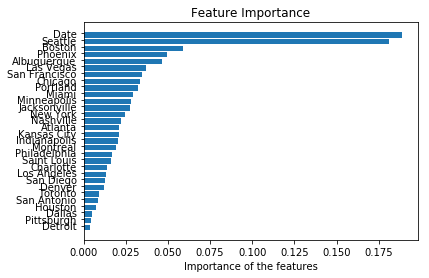

In [76]:

#print(gbr.feature_importances_)
indices = np.argsort(gbr.feature_importances_) #sort importances
# plot as bar chart of feature importance
plt.barh(np.arange(len(df1.iloc[:, 1:31].columns)), gbr.feature_importances_[indices])
plt.yticks(np.arange(len(df1.iloc[:, 1:31].columns)) + 0.25, np.array(df1.iloc[:, 1:31].columns)[indices])
_ = plt.xlabel('Importance of the features')
plt.title('Feature Importance')


As is seen above, 'Date', 'Seattle', 'Boston' are the top features when the target variable is 'Vancouver'. So, we will setup the X with those values.





Gradient boosting Regressor score on training set is  0.9272
Gradient boosting Regressor score on testing set is  0.7688


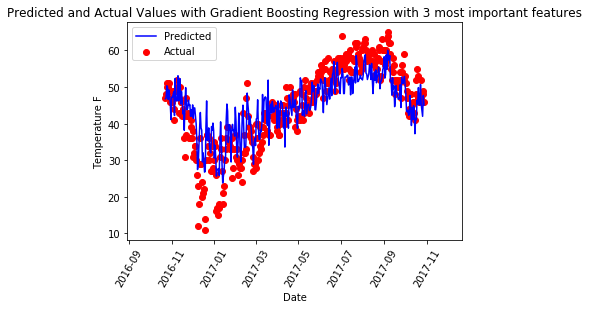

Mean Absolute Error: 4.3 degrees.
Accuracy: 88.05 %.


In [78]:
# Data for 3 important features
X = df1.iloc[:, [3,29,30]].values  #Seattle, Boston, Date
y = df1.iloc[:, 0].values
#splitting dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=False)

gbr_trimmed_data = ensemble.GradientBoostingRegressor()
titles = ['Predicted and Actual Values with Gradient Boosting Regression with 3 most important features', 'Gradient boosting Regressor score on training set is ', 'Gradient boosting Regressor score on testing set is ']
gbr_model1 = model_and_plot(gbr_trimmed_data, titles)
y_pred = gbr_model1.predict(X_test)
errors = abs(y_pred - y_test) ## Calculate the absolute errors
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y_test) ##Calculate mean absolute percentage error (MAPE)
accuracy = 100 - np.mean(mape) # Calculate accuracy
print('Accuracy:', round(accuracy, 2), '%.')


Model with top 3 important features is not performing as well as the basemodel. Accuracy has decreased when compared to it and also the Mean Absolute Error has increased. It goes to say that the other features are playing a role in predicting the dependent variable even though their importance is not much.


### Considering all the models we tried, The Random Forest Regressor with best params seems to give the best results with accuracy of 89.21% and good fit of training and test data.

###  Given above is the analysis for the city, Vancouver. Other city's prediction can be done similarly by setting up the target variable with required city and setting up the X variable.